In [392]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
#Load data set

train = pd.read_csv("/Users/amansahu/Downloads/train.csv")

In [394]:
test = pd.read_csv("/Users/amansahu/Downloads/test.csv")

In [395]:
#Checking Null Values

train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [396]:
test.shape

(25976, 25)

In [397]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [398]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [399]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

<Axes: >

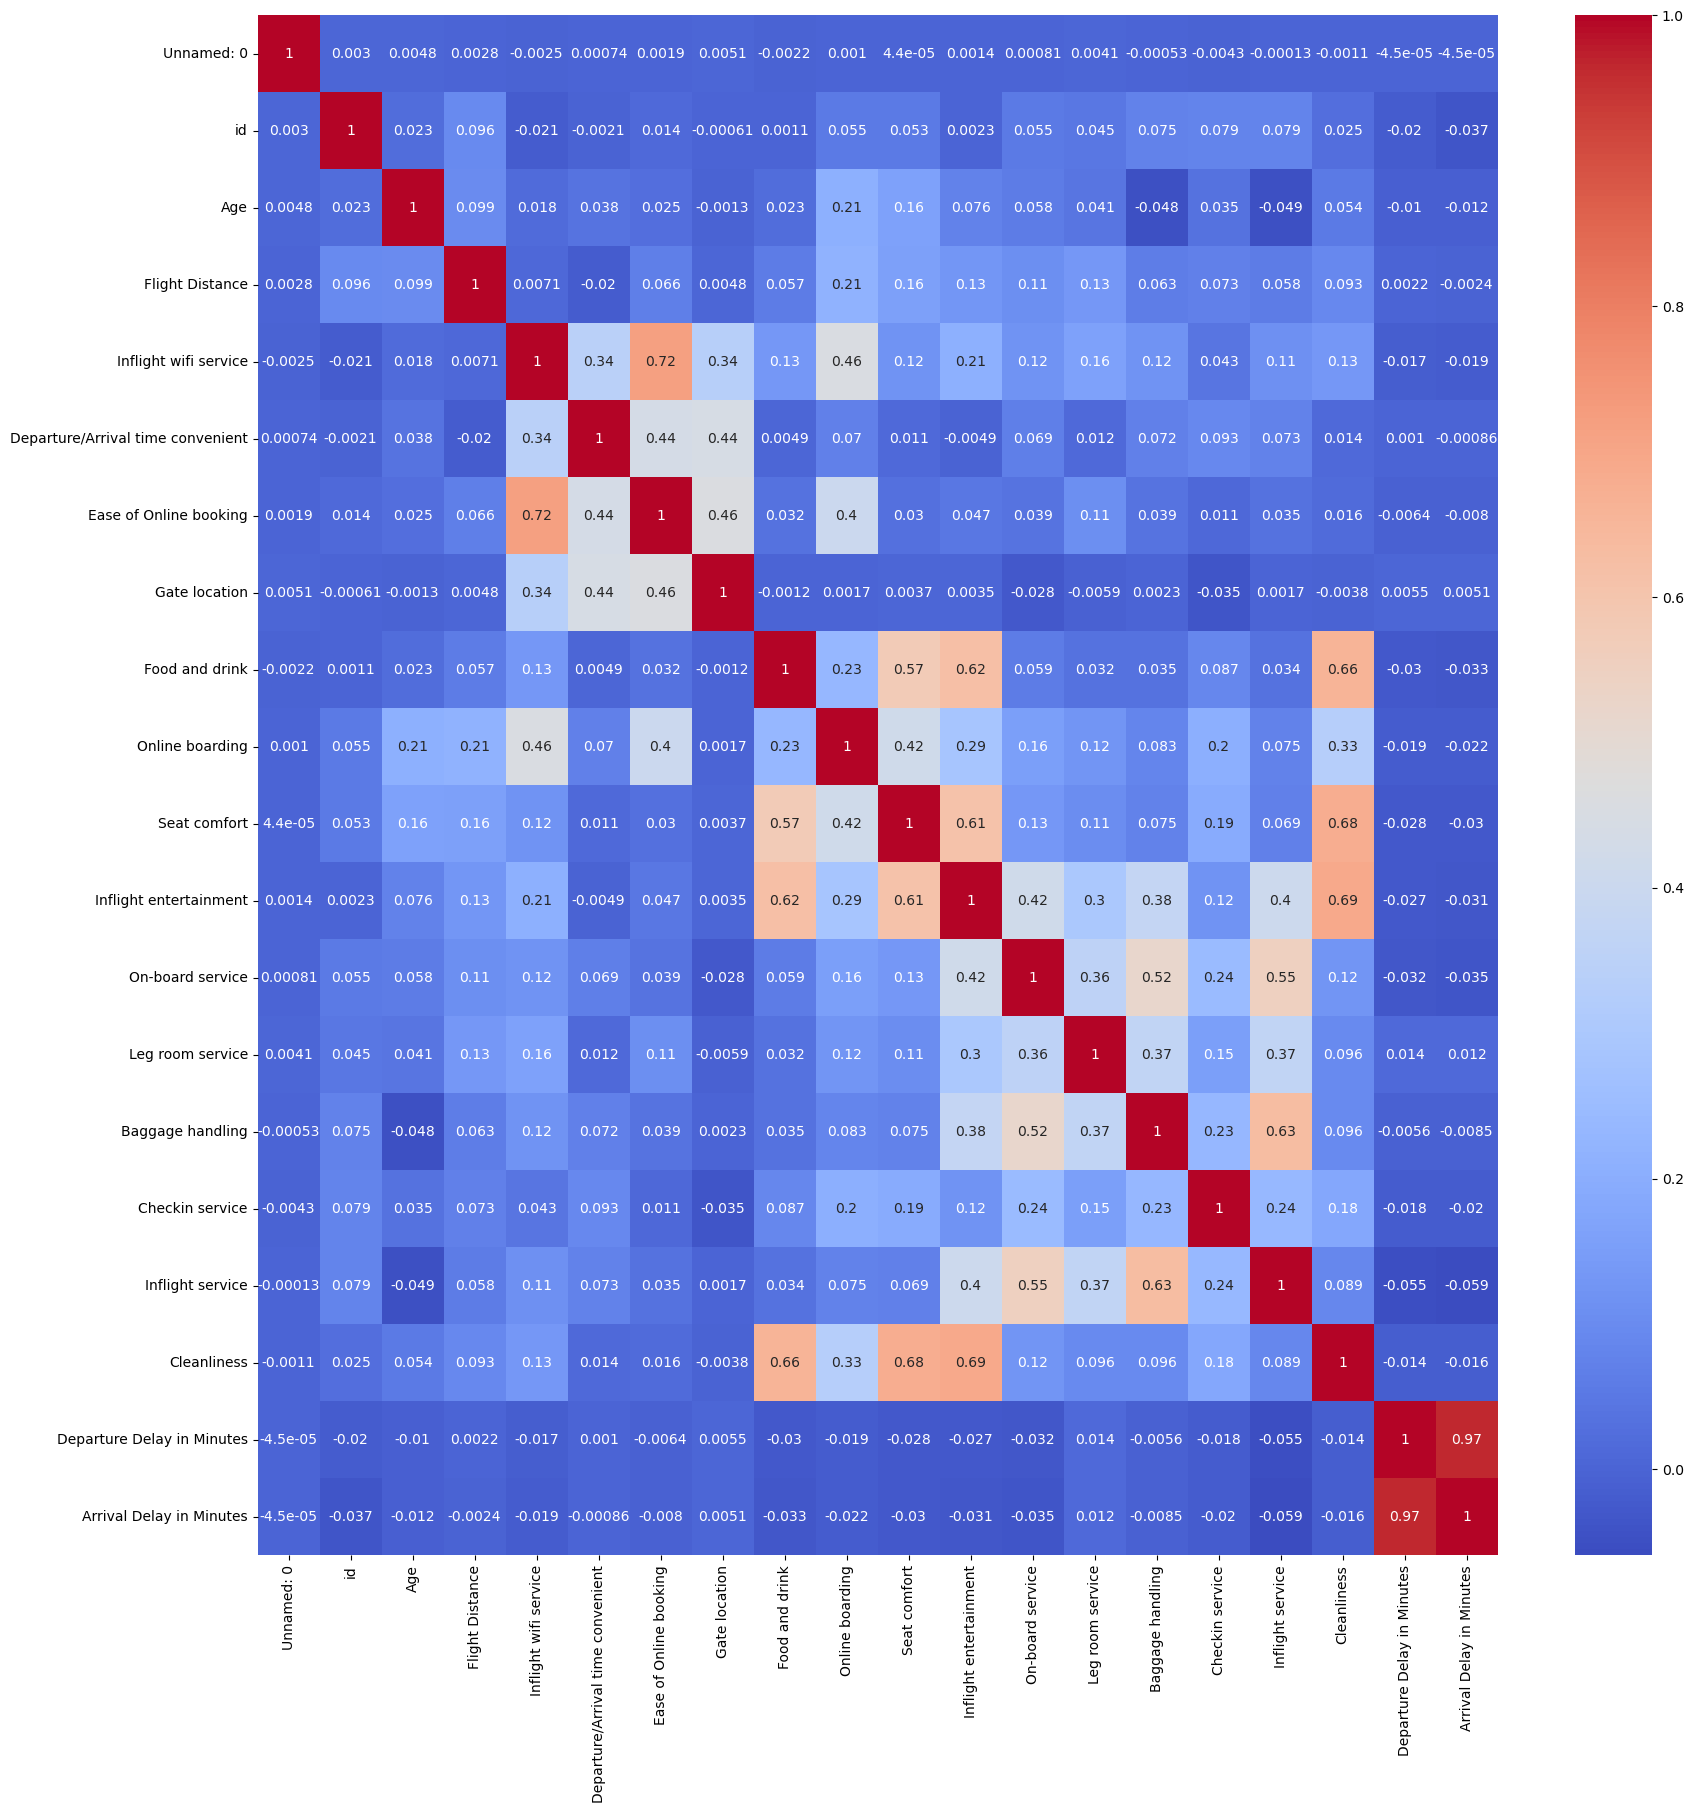

In [400]:
#Check co-relation between features using Heatmap

plt.figure(figsize = (20,20))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

In [401]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [402]:
train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [403]:
#Check Unique Values

train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [404]:
map = {'satisfied' : 1, 'neutral or dissatisfied' : 0}

train['satisfaction'] = train['satisfaction'].map(map)
test['satisfaction'] = test['satisfaction'].map(map)

In [405]:
train = train.drop(columns=['Unnamed: 0', 'id'], axis=1)
test = test.drop(columns=['Unnamed: 0', 'id'], axis=1)

In [406]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [407]:
numerical_variables = ["Age", "Flight Distance",  "Departure Delay in Minutes", "Arrival Delay in Minutes"]
categorical_variables = list(set(train.columns) - set(numerical_variables))

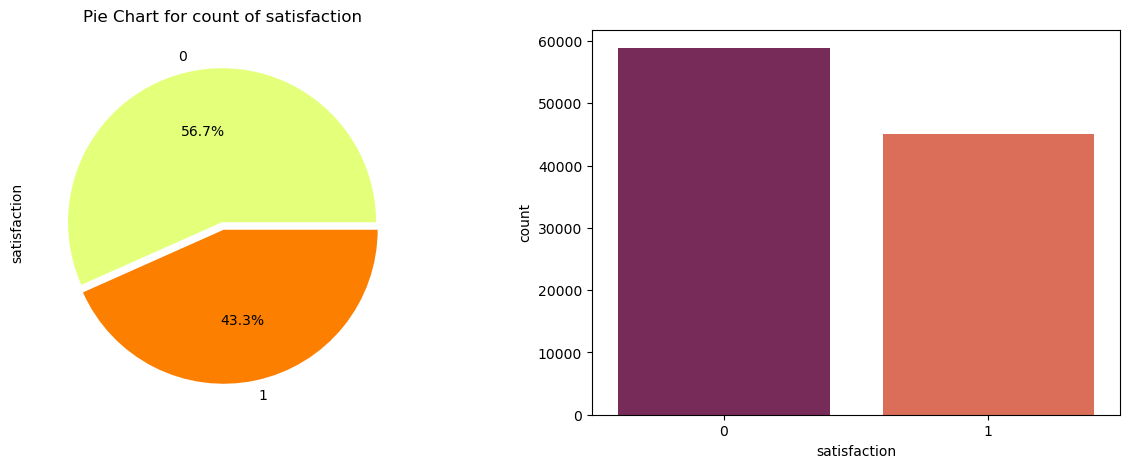

In [408]:
figure, axis = plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
train['satisfaction'].value_counts().plot.pie(ax=axis[0], autopct='%1.1f%%',title="Pie Chart for count of satisfaction",
                                              legend=False, colormap='Wistia', startangle=0, explode=(0, 0.05)) 
sns.countplot(data=train, x='satisfaction', palette="rocket")
plt.show();

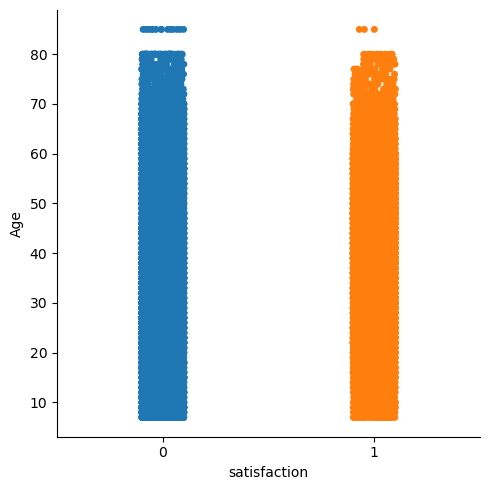

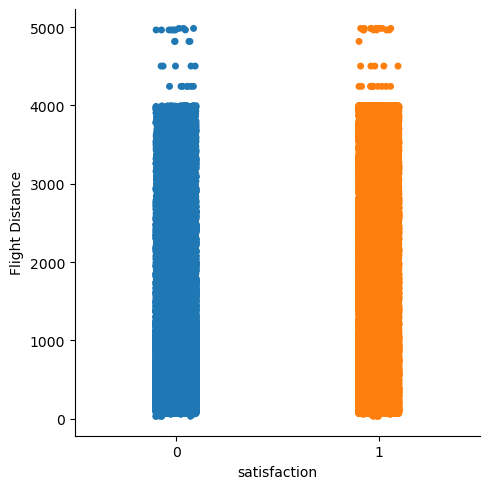

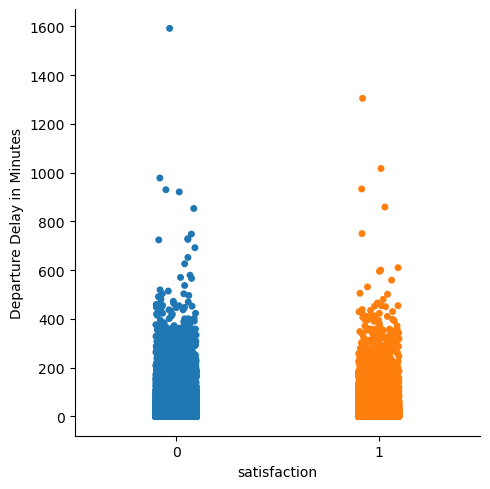

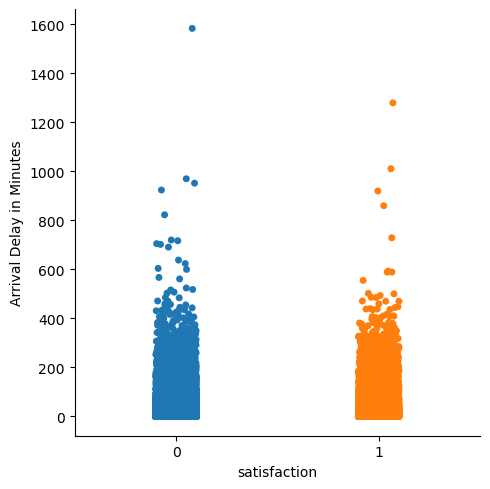

In [409]:
for i in numerical_variables:
    sns.catplot(data=train, y=i, x='satisfaction', palette='tab10')

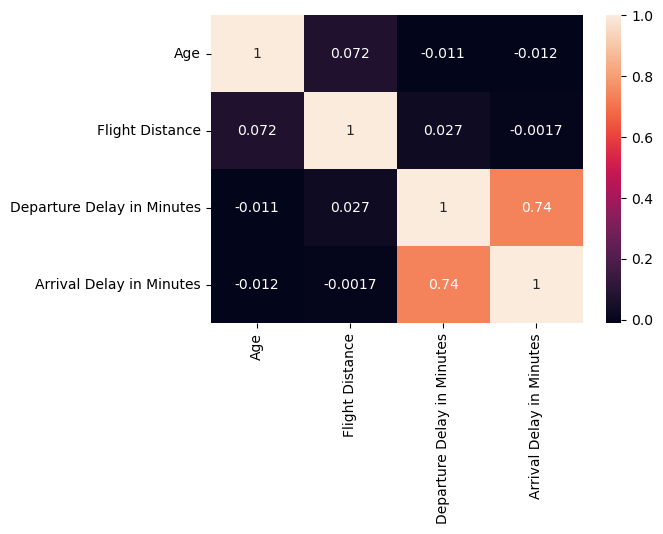

In [443]:
corr_matrix = train[numerical_variables].corr(method='spearman')
plt.subplots(figsize=(6,4))
sns.heatmap(data = corr_matrix, annot=True)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

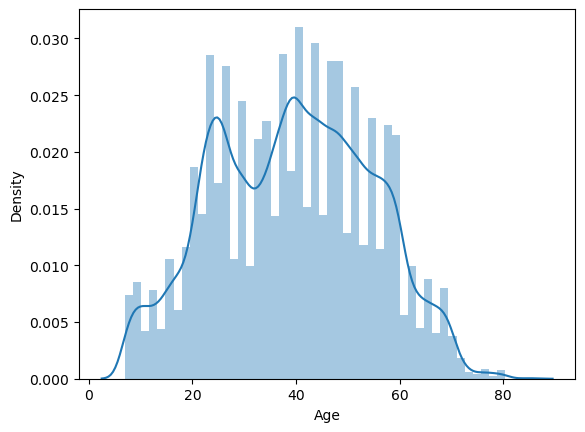

In [411]:
sns.distplot(train['Age'])

In [412]:
#Fill null values using median

median_value = train['Arrival Delay in Minutes'].median()
train['Arrival Delay in Minutes'].fillna(median_value, inplace=True)
test['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

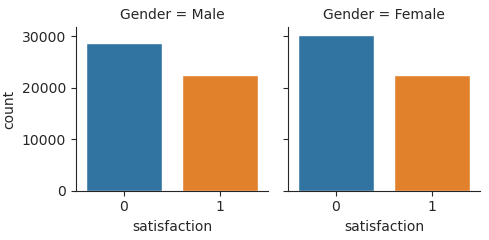

In [413]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot(x= "satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  

 It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

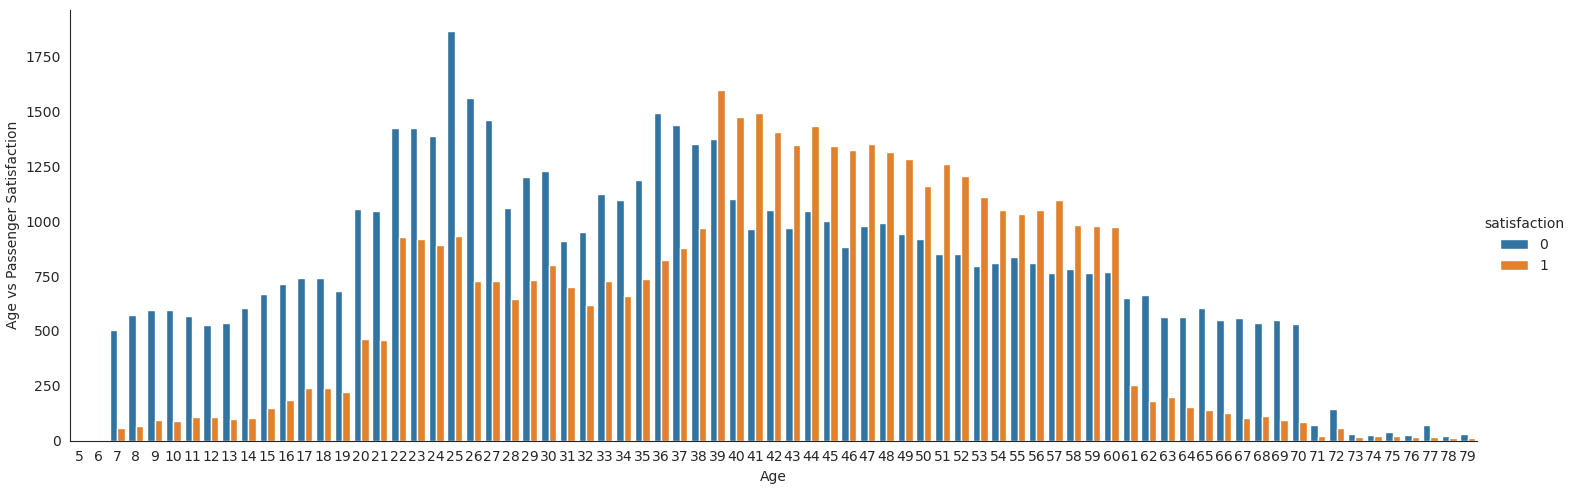

In [414]:
with sns.axes_style('white'):
    g = sns.catplot(x = "Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

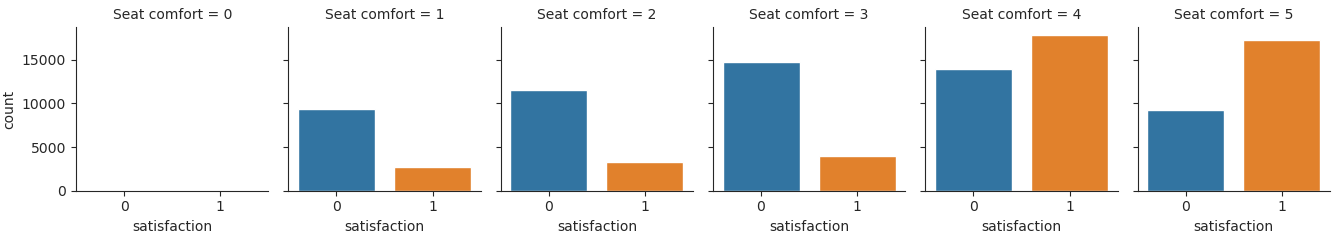

In [415]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x ="satisfaction", col= "Seat comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

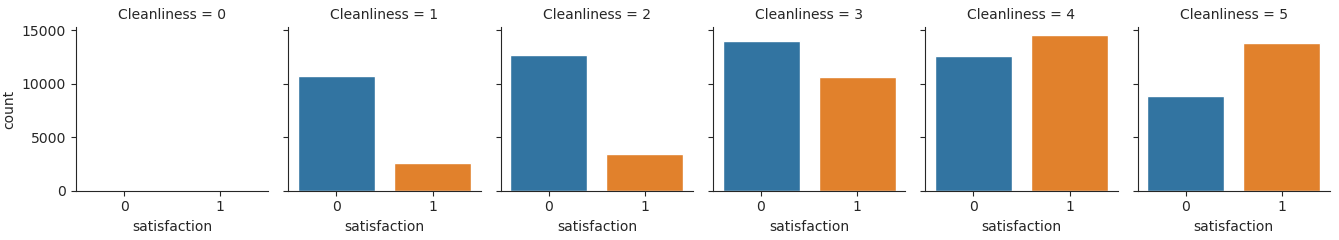

In [416]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x ="satisfaction", col= "Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

In [417]:
test.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1
25975,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,4,2,2,1,1,2,1,1,1,1,0,0.0,0


In [418]:
#create dummy variable for Class feature

class_dummies_train = pd.get_dummies(train['Class'])
train  = pd.concat([train,class_dummies_train],axis=1)
class_dummies_test = pd.get_dummies(test['Class'])
test  = pd.concat([test,class_dummies_test],axis=1)

In [419]:
test['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [420]:
map = {'Loyal Customer' : 1, 'disloyal Customer' : 0}

train['Customer Type'] = train['Customer Type'].map(map)
test['Customer Type'] = test['Customer Type'].map(map)

In [421]:
train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [422]:
travel_type_dummies = pd.get_dummies(train['Type of Travel'])
train  = pd.concat([train,travel_type_dummies],axis=1)

travel_type_dummies = pd.get_dummies(test['Type of Travel'])
test  = pd.concat([test,travel_type_dummies],axis=1)

In [423]:
map = {'Male' : 1, 'Female' : 0}

train['Gender'] = train['Gender'].map(map)
test['Gender'] = test['Gender'].map(map)

In [424]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Business                             0
Eco                                  0
Eco Plus                 

In [425]:
#Drop abandoned features after creating dummies

train = train.drop(columns=['Type of Travel','Class'], axis=1)
test = test.drop(columns=['Type of Travel','Class'], axis=1)

In [426]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].astype(int)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].astype(int)

In [427]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,1,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,0,0,1,0,1
1,1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,1,0,0,1,0
2,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,1,0,0,1,0
3,0,1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0,1,0,0,1,0
4,1,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,1,0,0,1,0


In [428]:
train.dtypes

Gender                               int64
Customer Type                        int64
Age                                  int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction                         int64
Business                             uint8
Eco                                  uint8
Eco Plus   

In [429]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Business                             0
Eco                                  0
Eco Plus                             0
Business travel                      0
Personal Travel          

In [430]:
#Check co-relation with target variable

correlation_matrix = train.corr()
correlation_with_target = correlation_matrix['satisfaction'].abs().sort_values(ascending = False)

In [431]:
correlation_with_target

satisfaction                         1.000000
Business                             0.503848
Online boarding                      0.503557
Eco                                  0.451118
Personal Travel                      0.449000
Business travel                      0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Eco Plus                             0.105363
Arrival Delay in Minutes          

In [432]:
X_train = train.drop(columns =['satisfaction'])
y_train = train['satisfaction']

In [433]:
from sklearn.ensemble import RandomForestRegressor

In [434]:
rf = RandomForestRegressor()

In [435]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [436]:
pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending = False)

Online boarding                      0.362635
Inflight wifi service                0.177004
Personal Travel                      0.074616
Business travel                      0.071963
Inflight entertainment               0.047531
Customer Type                        0.039605
Checkin service                      0.028550
Flight Distance                      0.024568
Age                                  0.022735
Business                             0.019390
Gate location                        0.018832
Baggage handling                     0.017295
Seat comfort                         0.015277
Inflight service                     0.015212
Leg room service                     0.011098
Cleanliness                          0.009768
Arrival Delay in Minutes             0.009576
On-board service                     0.008904
Departure Delay in Minutes           0.007229
Departure/Arrival time convenient    0.005820
Food and drink                       0.004240
Ease of Online booking            

In [437]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,1,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,0,0,1,0,1
1,1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,1,0,0,1,0
2,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,1,0,0,1,0
3,0,1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0,1,0,0,1,0
4,1,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,1,0,0,1,0


In [438]:
#Check outliers 

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter data excluding outliers
filtered_data = train[(train >= lower_bound) & (train <= upper_bound)]

In [439]:
filtered_data.shape

(103904, 26)

In [444]:
train.shape

(103904, 26)

In [445]:
train.to_csv('cleaned_data_train.csv', index=False)

In [446]:
test.to_csv('cleaned_data_test.csv', index=False)